# Activity 1: Data Analysis

## Using Jupyter Notebook
  
Code blocks generally look like this:

In [23]:
print("Hello world!")

Hello world!


I recommend that the user run these cells one by one rather than all at once - it’ll make the code easier to follow. To run a cell, select it and click run at the top of your menu or command + enter / shift + enter (depending if you are on a Mac or another computer). Try it on the cell above.

## Introduction

Before we begin building networks and predicting future crimes, it’s important to get to know our data. In the Data analysis section of this project, we’ll take a closer look at the Crime Data offered to us by Seattle GeoData, then answer a couple questions. 

<blockquote>
    <h3>Pre-activity question:</h3>

Why would it be important for emergency services to know when, where, and what crimes occur the most often? In other words, why is it important for us to analyze our Crime Data? 

<br>
    
<h4>Solution:</h4>
    
Finding patterns or trends in crime can be used to help law enforcement in several ways,  including:
    
    
-  Locating “hot spots,” or times and areas where a specific crime or a range of criminal activity is occurring. 
-  Identifying how a major event has affected the civilian population (we’ll see an example of this later)
-  Detecting a change in criminal trends over time in a specific location due to emerging problems in the area
    
    
This information allows law enforcement to better prepare to address crimes. For example, locating crime “hot spots” helps police officers or emergency personnel plan their manpower needs, determining when and where to patrol and thus maximize their effectiveness. 

Going through this particular dataset could also help us ensure its accuracy, since it would be harmful to draw conclusions from data riddled with errors or inaccuracies.


Run the cell below to import the libraries we'll use in our project.

In [24]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's import our data (this might take a couple minutes). It'll will produce a table with each row representing a single offense that occured from 2009-2020.

In [25]:
#Importing datasets and making small edits
crime = pd.read_csv("seattlecrime.csv")
neighborhood = pd.read_csv("neighborhooddata.csv")
crime = crime.drop(["Report Number", "Offense ID", "Group A B", "Offense Code", "100 Block Address", "Report DateTime","Precinct", "Sector","Beat"], axis = 1)

drop = ["Olympic Hills/Victory Heights", "North Beach/Blue Ridge",
        "Sunset Hill/Loyal Heights", "Interbay", "Cedar Park/Meadowbrook", "Wedgwood/View Ridge", "Riverview",
        "Green Lake", "Licton Springs", 'Haller Lake', 'Whittier Heights', "North Capitol Hill", "Arbor Heights"]
for i in drop:
    neighborhood = neighborhood[neighborhood["CRA_NAME"] != i]

replace_neighborhoods = {"Roxhill/Westwood": "ROXHILL/WESTWOOD/ARBOR HEIGHTS","Fauntleroy/Seaview": "FAUNTLEROY SW", "Laurelhurst/Sand Point": "SANDPOINT","Cascade/Eastlake": "SLU/CASCADE",
"West Seattle Junction/Genesee Hill": "GENESEE","Seward Park": "LAKEWOOD/SEWARD PARK","Ravenna/Bryant": "ROOSEVELT/RAVENNA","Duwamish/SODO": "SODO","University District": "UNIVERSITY",
"Broadview/Bitter Lake": "BITTERLAKE","Greenwood/Phinney Ridge": "GREENWOOD","Beacon Hill": "MID BEACON HILL",
"North Beacon Hill/Jefferson Park": "JUDKINS PARK/NORTH BEACON HILL","Northgate/Maple Leaf": "NORTHGATE","Mt. Baker/North Rainier": "MOUNT BAKER","Pioneer Square/International District": "PIONEER SQUARE",
"Alki/Admiral": "ALKI","Downtown Commercial Core": "DOWNTOWN COMMERCIAL","Ballard": "BALLARD NORTH","Judkins Park": "JUDKINS PARK/NORTH BEACON HILL",'South Beacon Hill/NewHolly': "SOUTH BEACON HILL"} 

neighborhood.replace({"CRA_NAME":replace_neighborhoods}, inplace = True)
neighborhood["CRA_NAME"] = neighborhood["CRA_NAME"].str.upper()

new_drop = ['NORTH BEACON HILL', 'BALLARD SOUTH',
        'NORTH ADMIRAL', 'PHINNEY RIDGE','ALASKA JUNCTION','CHINATOWN/INTERNATIONAL DISTRICT',  'EASTLAKE - EAST','HILLMAN CITY', 'EASTLAKE - WEST', 'CLAREMONT/RAINIER VISTA', 'SOUTH DELRIDGE', 'NEW HOLLY',
        'PIGEON POINT','MORGAN', 'BRIGHTON/DUNLAP', 'UNKNOWN','COMMERCIAL HARBOR ISLAND', 'COMMERCIAL DUWAMISH','LAKECITY','RAINIER VIEW']

for i in new_drop:
    crime = crime[crime["MCPP"] != i]
    
new_neighborhood = neighborhood.copy()
new_neighborhood.set_index("CRA_NAME", inplace = True)
new_dict = new_neighborhood.to_dict()["GEOID10"]
crime.replace({"MCPP":new_dict}, inplace = True)
crime.rename(columns = {"MCPP": "GEOID10"}, inplace = True)
crime.to_csv("updated_crime.csv")

crime = pd.read_csv("updated_crime.csv")
neighborhood = pd.read_csv("neighborhooddata.csv")
crime = crime.replace("Destruction/Damage/Vandalism of Property", "Destruction/Damage of Property")
crime = crime.drop(["Unnamed: 0"],axis = 1)
crime.head(3)

,Offense Start DateTime,Offense End DateTime,Crime Against Category,Offense Parent Group,Offense,GEOID10,Longitude,Latitude
0,2020-02-05 10:10:00,NaN,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,530330057001039,-122.385974,47.649387
1,2020-02-03 08:00:00,2020-02-04 08:00:00,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,530330042002021,-122.323399,47.675118
2,2020-02-02 20:30:00,2020-02-02 21:30:00,PROPERTY,ROBBERY,Robbery,530330042002021,-122.299552,47.666384


As we can see above, the Seattle crime dataset tells us the following about each crime commited:
- The report number
- Offense ID
- Offense start and end date
- Offense Report Date
- Offense Group
- Offense Category
- Offense Parent Group
- Location through precinct, sector, and beat
- Location through GEOID10 (this is a code that represents a certain area in Seattle)
- Location through Address within 100 blocks
- Location through Longitude + Latitude

Using that information, we're going to determine where, when, and what crimes occur most often in Seattle.

### Crimes by location

Let's start by visualizing where crimes occur most often in various Census Report Areas (CRAs).

In [26]:
#Create a table with two columns: GEOID and Count
crimes_by_geo = pd.DataFrame(crime["GEOID10"].value_counts())
crimes_by_geo.reset_index(inplace=True)
crimes_by_geo.columns=['GEOID10','Count']

#Add a CRA column
CRA = neighborhood.copy()
CRA = CRA[["GEOID10", "CRA_NAME"]]
crimes_loc = crimes_by_geo.merge(CRA)
crimes_loc.head(3)

,GEOID10,Count,CRA_NAME
0,530330081001023,73535,Downtown Commercial Core
1,530330084001003,51595,Capitol Hill
2,530330012004008,48120,Northgate/Maple Leaf


We can see above that the three areas with the highest number of crimes has been Downtown,  Capitol Hill, and Northgate/Maple Leaf.

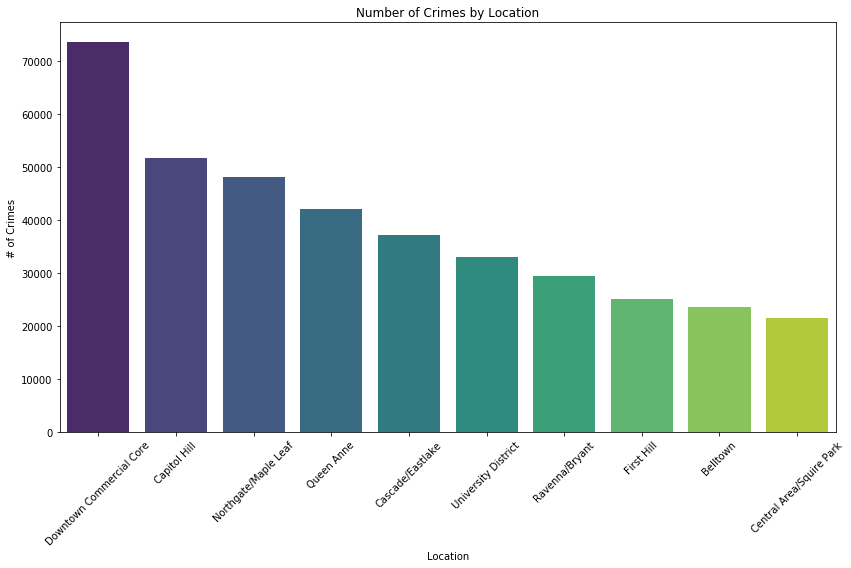

In [27]:
#Create a barplot of CRA names and number of crimes
figure1 = plt.figure(figsize=(12,8))
show_geo = sns.barplot(data = crimes_loc.head(10), x = 'CRA_NAME',y = 'Count', palette="viridis")
show_geo.set_xticklabels(show_geo.get_xticklabels(),rotation=45)
plt.xlabel("Location")
plt.ylabel("# of Crimes")
plt.title("Number of Crimes by Location")
figure1.tight_layout()

Below is the same chart, but with Crime Rate on the y-axis instead of the # of crimes. Crime Rate is calculated by taking the number of crimes in an area and dividing it by its population, then multiplying it by 100,000.

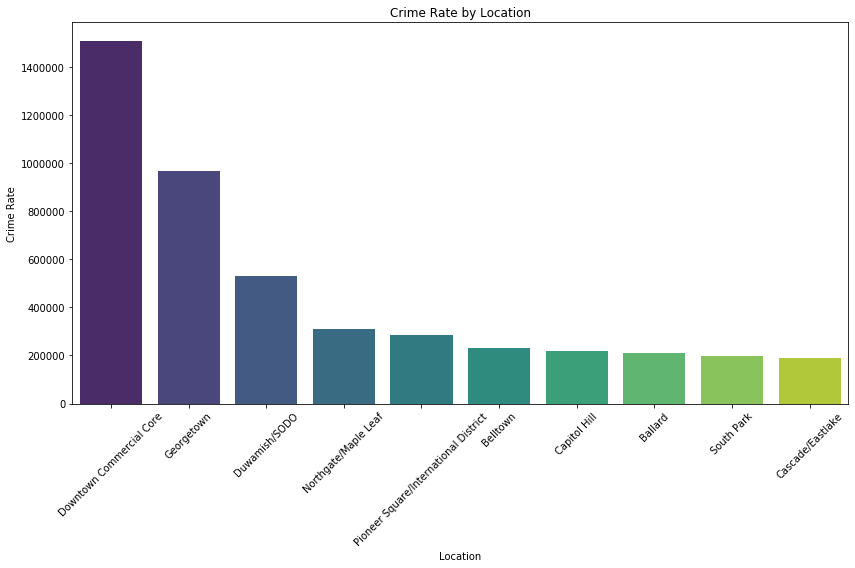

In [28]:
#Load population data and merge with crime data
census = pd.read_csv("census.csv")
get_neighborhood = neighborhood.set_index("CRA_NAME")
neighborhood_dict = get_neighborhood.to_dict()["GEOID10"]
census.replace({"Community Reporting Area Names":neighborhood_dict}, inplace = True)
census.rename(columns = {"Community Reporting Area Names": "GEOID10"}, inplace = True)

#Create crime rate column
crime_rate = crimes_loc.merge(census)
crime_rate["Total Population"] = crime_rate["Total Population"].str.replace(',', '').astype(float)
crime_rate["Crime Rate"] = ((crime_rate["Count"]/crime_rate["Total Population"])*100000).astype(float)

#Create a barplot of CRA names and crime rates
figure2 = plt.figure(figsize=(12,8))
show_geo = sns.barplot(data = crime_rate.sort_values(by = ["Crime Rate"], ascending = False).head(10), x = 'CRA_NAME',y = 'Crime Rate', palette="viridis")
show_geo.set_xticklabels(show_geo.get_xticklabels(),rotation=45)
plt.xlabel("Location")
plt.ylabel("Crime Rate")
plt.title("Crime Rate by Location")
figure2.tight_layout()

<blockquote>
    <h3>Question 1:</h3>

What is the difference between the number of crimes and crime rate? 
Why were the neighborhoods with a high number of crimes different from the neighborhoods with a high crime rate?
<br>
    
When determining which areas in Seattle have the most criminal activity, why is it important to distinguish between a crime rate and the number of crimes?

  
<h4>Solution:</h4>
Crime rates calculate the number of crimes per 100,000 people, meaning they are affected by an area’s population and its raw number of crimes. 
    
These neighborhoods that had a large number of crimes but a small crime rate usually had a high population that lowered the density of crimes in the area. For example, in the chart ranking by # of Crimes, Capitol Hill has the second-highest number of crimes, but in the chart ranking by Crime Rate, Georgetown has the second-highest crime rate. Capitol Hill, though it had a higher number of crimes, also had a relatively high population, meaning its crime rate was farther down the spectrum in the second chart. Meanwhile, Georgetown had a relatively small population and therefore a higher density of crimes for its population, meaning its crime rate was higher. 

It’s important to differentiate between a crime rate and the number of crimes because a district or neighborhood with more crimes could just be a large, low-density area where the overall crime rate is low. If we put heavy police patrol in an area with a high number of crimes but a low crime rate, this wouldn’t maximize police effectiveness.

Run the cell below-- it produces a heatmap of Seattle divided into grids by longitude and latitude, where brighter colors signifying a higher number of crimes. 

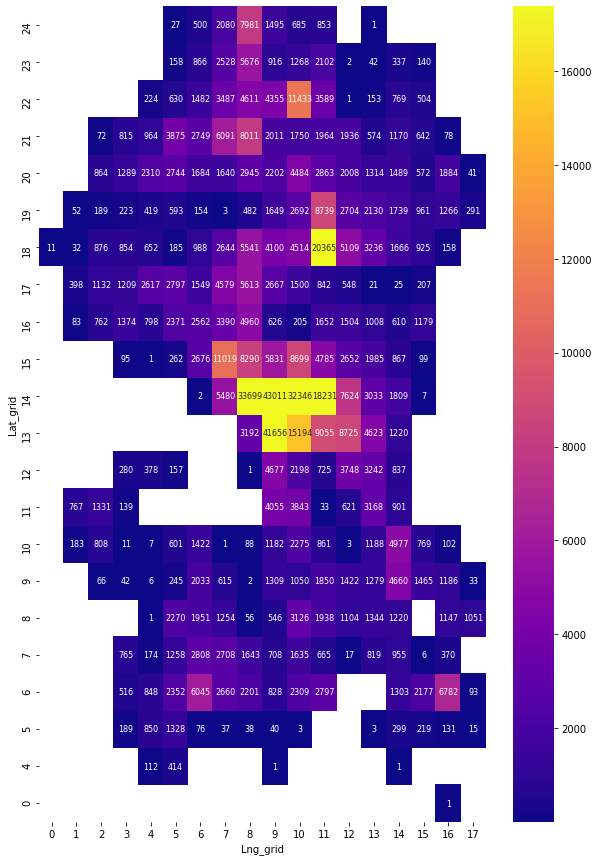

In [29]:
#Creating copy of crime data
crime_map = crime.copy()
#Finding and removing outliers in the data
outliers = crime_map.loc[((crime_map['Latitude'] < 46.00) | (crime_map['Latitude'] > 48.00)) & 
                   ((crime_map['Longitude'] > -121) | (crime_map['Longitude'] < -123))]

crime_map = crime_map.loc[((crime_map['Latitude'] > 46.00) & (crime_map['Latitude'] < 48.00)) & 
                  ((crime_map['Longitude'] > -123) & (crime_map['Longitude'] < -121))]

#Divide latitude and longitude
epsilon = 0.0001
lat_range = crime_map['Latitude'].max() + epsilon - crime_map['Latitude'].min()
lng_range = crime_map['Longitude'].max() + epsilon - crime_map['Longitude'].min()

lat_split = 25
lng_split = 18
crime_map['Lat_grid'] = (np.floor(((crime_map['Latitude']-crime_map['Latitude'].min())/(lat_range/lat_split)))).astype(int)
crime_map['Lng_grid'] = (np.floor(((crime_map['Longitude']-crime_map['Longitude'].min())/(lng_range/lng_split)))).astype(int)
crime_map = crime_map.drop(['Latitude','Longitude'],axis = 1)

# Visualize data on the geogrid.
dt_geogrid = crime_map.groupby(['Lat_grid','Lng_grid']).size().reset_index(name='count')
dt_geoheatmap = dt_geogrid.pivot(index='Lat_grid',columns='Lng_grid', values='count')
# Generate heatmap
fig, ax = plt.subplots(figsize=(10,15))  
ax = sns.heatmap(dt_geoheatmap,annot=True,annot_kws={"fontsize":8},fmt=".0f",cmap='plasma',robust = True)
ax.invert_yaxis()

<blockquote>
    <h3>Question 2:</h3>

Compare this heatmap with a <a href= "https://drive.google.com/file/d/1Bs3yIglhNqAGtGmf6f8GBtVatsbQlyT-/view?usp=sharing" >map of seattle</a>. 

In which general areas are the # of crimes the highest (the heatmap is yellow, orange, or a lighter shade of purple)? If you're having trouble with this question, check the charts above for neighborhoods with high crime rates/high number of crimes. Do some of these areas align with the map?

    
    
   
<h4>Solution:</h4>
The highest concentration of crimes are condensed in the Seattle Downtown area (which includes Belltown, Duwamish/SoDo, and Central Area/Squire Park), but it looks as though the area around the University of Washington, as well as Northgate, Georgetown, and West Seattle (which would possibly include South Park) have relatively high concentrations as well.


    
<h3>Something to consider:</h3>

When using the map and graphs to determine the number of crimes and crime rate of different locations, the downtown area of Seattle had the highest number of crimes and the highest crime rate. Can you think of why this may be?

### Crimes by Time (Hour, Day, Month, & Year)
Run the following cell to set up our data.

In [30]:
# Create columns for hour, Day of Week, Month, Year, Date
crime_time = crime.copy()
crime_time['Offense Start DateTime'] = pd.to_datetime(crime_time['Offense Start DateTime'])

crime_time['Hour'] = crime_time['Offense Start DateTime'].apply(lambda v:v.hour)
crime_time['Day Of Week'] = crime_time['Offense Start DateTime'].apply(lambda v:v.dayofweek)
crime_time['Month'] = crime_time['Offense Start DateTime'].apply(lambda v:v.month)
crime_time['Year'] = crime_time['Offense Start DateTime'].apply(lambda v:v.year)
crime_time['Date'] = crime_time['Offense Start DateTime'].apply(lambda v:v.date())

# Map day values to proper strings
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
crime_time['Day Of Week'] = crime_time['Day Of Week'].map(dmap1)
crime_time = crime_time[crime_time["Year"]>2008]

In the meantime, take a quick look at the Introduction and the "Hazardous Hours" infographic/text section of the following study. 

<a href= "https://www.thesleepjudge.com/crimes-that-happen-while-you-sleep/" > Crimes that Happen While You Sleep</a>

<blockquote>
    <h3>Question 3:</h3>

During what time of day are "peak hours" of crime?

What day(s) of the week has the highest crime rate altogether? What day(s) of the week has the highest crime rate during the night? During the day?


<h4>Solution:</h4>
The “peak hours” of crime occur during the day, from 7 AM to 7 PM.

Friday has the highest crime rate altogether during the day and night. During the day, weekdays (Monday through Friday) have the highest crime rate, and during the night, weekends (Saturday and Sunday) have the highest crime rate.


Now, we can look for similarities between the conclusions drawn from the study and the data we have of Seattle. Let's start with the number of crimes that occured during various hour of the day. 

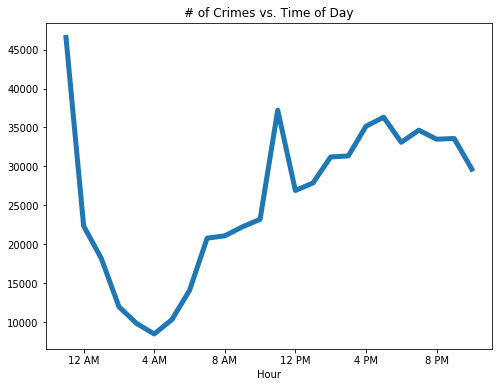

In [31]:
#Create line plot of crimes per hour
hour = crime_time.groupby("Hour").count()
plt.title("# of Crimes vs. Time of Day")
plt.xticks(np.arange(1,24,4),['12 AM','4 AM','8 AM','12 PM','4 PM','8 PM'])
hour['Offense'].plot(figsize=(8,6),label='Total',lw=5)

Like the crime study, the number of crimes in Seattle generally peak during the day between 7 AM and 7 PM.

Below is a plot with crimes numbered by the day of the week.

Text(0, 0.5, '# of Crimes')

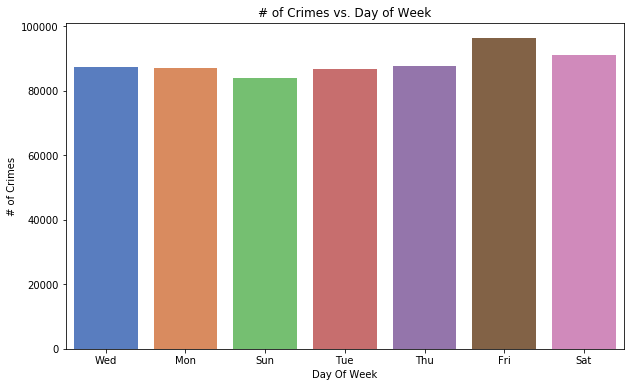

In [32]:
#Create bar plot of crimes per weekday
weekday_plot = plt.figure(figsize=(10,6))
sns.countplot(x = "Day Of Week", palette='muted', data = crime_time)
plt.title("# of Crimes vs. Day of Week")
plt.ylabel("# of Crimes")

Friday appears to experience the highest number of crimes overall, similarly to the study.
<blockquote>
    <h3>Something to consider:</h3>

Why would Fridays have the highest rate of crime?


Below is a heatmap depicting the number of crimes that occuring during each hour of each day of week. According to the key on the right, darker colors signify a low number of crimes, and brighter colors signify a high number of crimes.

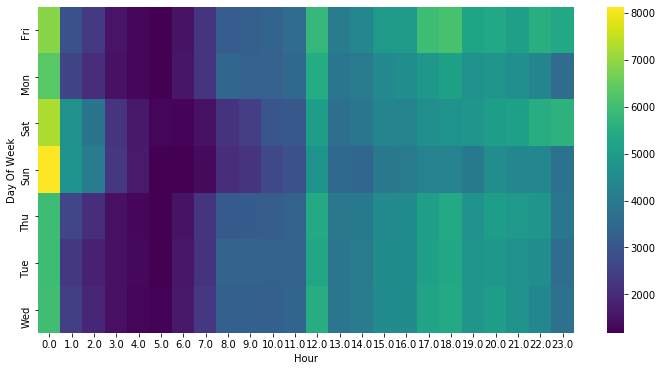

In [33]:
#Create heatmap of crimerate per day of week and hour
dayHour=crime_time.groupby(by=['Day Of Week','Hour']).count()['Offense'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis');

<blockquote>
    <h3>Question 4:</h3>

The crime study stated that during that day, the number of crimes was highest during weekdays. During the night, however, the number of crimes was highest during weekends. Using the heatmap to aid you, do we see these patterns in the Seattle Data?


<h4>Solution:</h4>
On the heatmap, all the weekdays look relatively the same, with the darker squares grouped from hour 1-8 (so from 1 AM to 8 AM), or during the night. This means that the peak crime time for weekdays was from 9 AM to 12 PM. During weekends, however, the majority of dark squares are edged a couple of spaces to the right, grouping around 3 AM to 10 AM. Peak crime time for weekends, therefore, is around 11 AM to 2 AM. 
    
This somewhat matched with the crime study’s claims, since the peak hours of crime during weekdays started in the morning and tapered off after midnight, but the peak hours of crime during weekends started a couple of hours later in the morning and incorporated more hour past midnight. Therefore, there must have been more crimes that occurred during the night on weekends than on weekdays.

Below is a line plot depicting how the number of crimes have changed over all time. As can be seen below, the crime rate holds pretty steady until a huge spike in mid-2020.

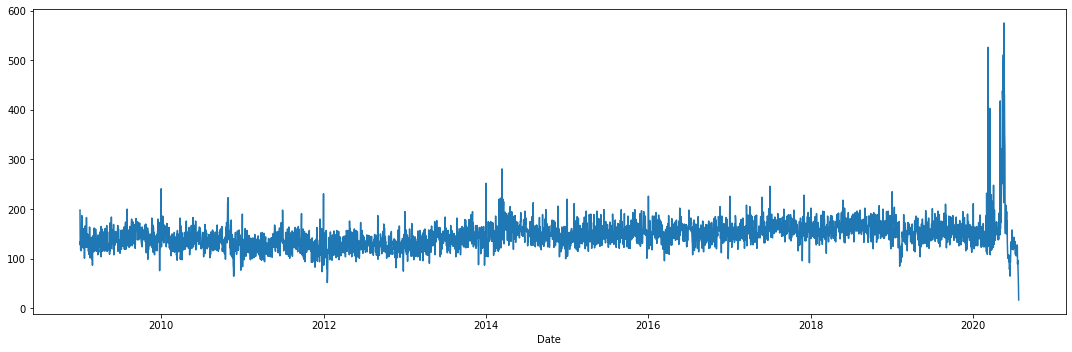

In [34]:
#Create line plot of crimes according to date
plt.figure(figsize=(15,5))
crime_time.groupby('Date').count()['Offense'].plot();
plt.tight_layout()

The table and line graph below tell us the exact dates when these spikes in crime rates were recorded.

In [35]:
#Create table of dates with the highest number of crimes
crime_dates = crime_time[crime_time["Year"] == 2020]
top_10_days = pd.DataFrame(crime_dates["Date"].value_counts().head(10))
top_10_days.reset_index(inplace=True)
top_10_days.columns=['Date','Count']
top_10_days.head(10)

,Date,Count
0,2020-05-18,575
1,2020-03-08,526
2,2020-05-15,511
3,2020-05-14,490
4,2020-05-11,438
5,2020-05-19,434
6,2020-05-20,430
7,2020-05-12,425
8,2020-05-01,418
9,2020-03-15,403


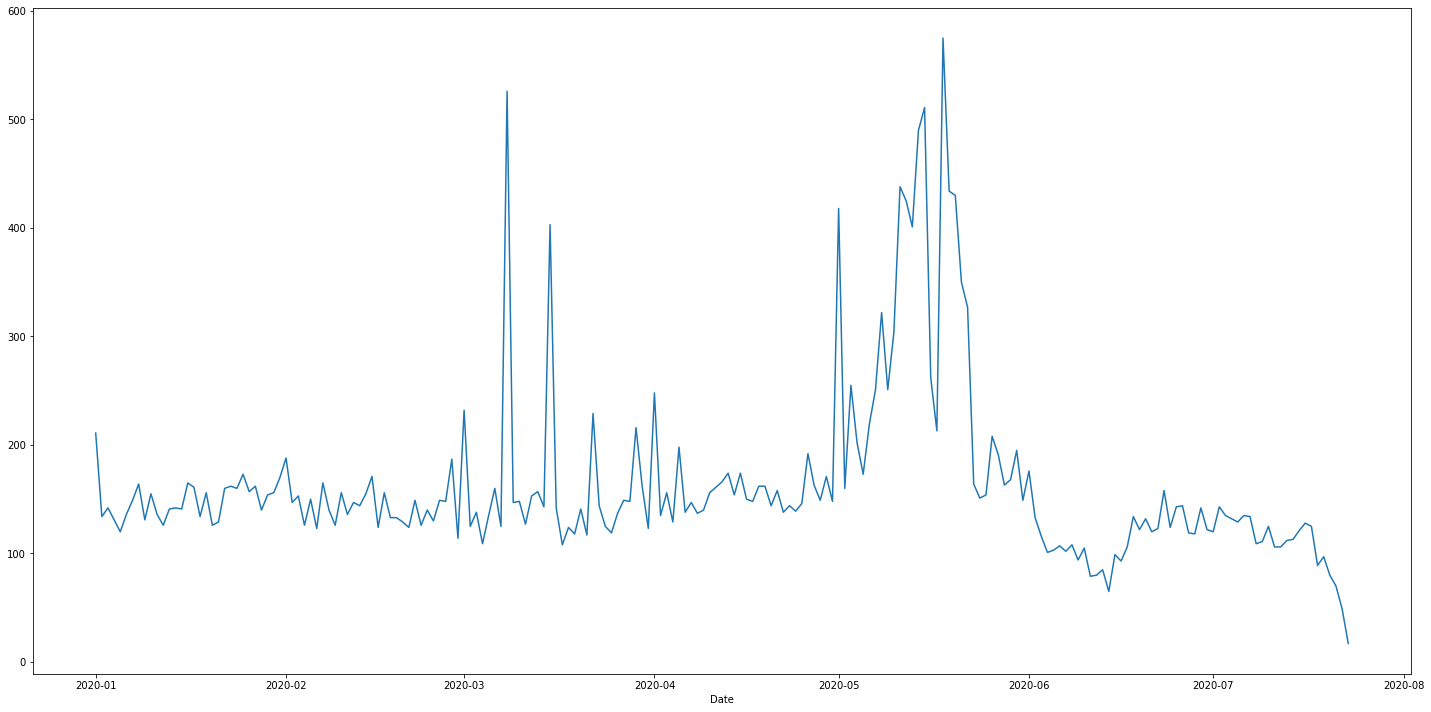

In [36]:
#Plot crimes according to days in 2020
crime_2020 = crime_time[crime_time["Year"] == 2020]

plt.figure(figsize=(20,10))
crime_2020.groupby('Date').count()['Offense'].plot();
plt.tight_layout()

It looks like the crime rate increased sharply in March and May, with some of the dates with the highest number of crimes being May 18 and March 8. Whatever occured during these days that could have caused this sharp uptick in crime, so let's investigate that.

Run the cell below- it should ask you to input a year. Move through each year by running the cell with 2009, 2010, 2011, etc. all the way to 2020. Then, answer the corresponding question in your google form.

In [ ]:
#Input by year
ask = int(input("Input a year between 2009 and 2020: "))
crime_by_year = crime_time[crime_time["Year"] == ask]

#Separate top 10 types of crimes that occured
top_10_reason = pd.DataFrame(crime_by_year["Offense"].value_counts().head(10))
top_10_reason.reset_index(inplace = True)
top_10_reason.columns=['Offense','Count']
reason_plot = plt.figure(figsize=(12,6))
top_reason = sns.barplot(data = top_10_reason, x = 'Offense',y = 'Count', palette="summer")
top_reason.set_xticklabels(top_reason.get_xticklabels(),rotation=45)
plt.title("Reason vs. # of Crimes")
plt.ylabel("# of Crimes")
reason_plot.tight_layout()

<blockquote>
    <h3>Question 5:</h3>

Were there specific patterns that you noticed? More importantly, were these patterns broken in any way?


<h4>Solution: </h4>
From 2009-2019, the number one most common offense was always “Theft from Motor Vehicle,” usually followed by “Burglary/Breaking and Entering,” then “Destruction/Damage of Property.” However, in 2020, the number one most common offense was “Identity Theft,” followed by the usual three.

<h3> Finding an explanation </h3>


A quick google search can reveal why there were an unusually high amount of "identity theft" type crimes in March and May. Read the articles below to (or skim the headlines) to see why.

<a href= "https://www.beckershospitalreview.com/cybersecurity/seattle-children-s-hacking-attempts-doubled-in-march-targeting-info-of-newborns-and-children-who-die-at-hospitals.html/" >Article 1</a>

<a href= "https://krebsonsecurity.com/2020/07/business-id-theft-soars-amid-covid-closures/" >Article 2</a>

<a href= "https://www.kiro7.com/news/local/impostors-wreak-havoc-washington-state-unemployment-system/HCDYMC6OFFES7HHLZSR2W5UKXI/" >Article 3</a>

<a href= "https://www.king5.com/article/money/your-money-your-future/unemployment-fraud-on-the-rise/281-e988f645-b08c-40a8-ae92-39e419f3c231" >Article 4</a>

<a href= "https://www.king5.com/article/news/health/coronavirus/criminals-are-exploiting-covid-19-emergency-with-unemployment-fraud-what-to-do-if-it-happens-to-you/281-7abe3d9f-dc76-4467-9797-8a71503fa4b0" >Article 5</a>




<blockquote>
       <h3>Question 6:</h3>

What do all of these articles have in common? What is at the root of the identity theft crisis?


 
<h4>Solution:</h4> 
    
 
It appears that the COVID-19 pandemic is at the root of the identity theft crisis.
   
- In article 1, the pandemic caused an increase in hackers attempting to steal the identities of newborns, toddlers, and children who died at hospitals. 
- After the pandemic began, many small businesses closed down or went out of business. In article 2, identity thieves targeted them to get loans and unemployment benefits issued to them.
- Article 3 also describes mass identity theft hitting those with unemployment benefits.
- Article 4 and 5 also report instances of unemployment fraud.

At the beginning of this activity, we concluded that it was important to analyze this dataset because it could "Identify how a major event has affected the civilian population." We can see how this "major event" of COVID-19 has affected the civilian population through the crimes they commited.

Now that we've drawn a couple conclusions from our dataset, we can find other uses for it. Proceed to the "Building a Network" part of this project, where we'll use more data to determine what causes crime.